In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart failure.csv')

In [11]:
df.head()
data=df.copy()

In [4]:
df.shape

(299, 13)

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

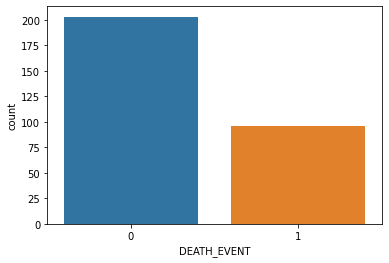

In [7]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

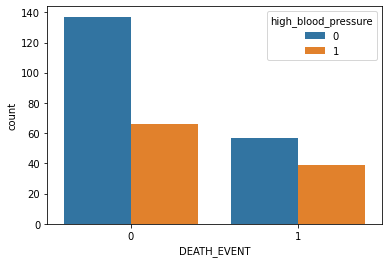

In [8]:
sns.countplot(x='DEATH_EVENT',data=df,hue='high_blood_pressure')

In [9]:
x=df.drop('DEATH_EVENT',axis=1)

In [10]:
y=df[['DEATH_EVENT']]

# train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc=DecisionTreeClassifier()

In [16]:
dtc


DecisionTreeClassifier()

In [17]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [18]:
predict=dtc.predict(xtest)

In [19]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy=accuracy_score(ytest,predict)

In [24]:
accuracy

0.7866666666666666

In [27]:
dtc.score(xtrain,ytrain['DEATH_EVENT'])

1.0

In [28]:
dtc.score(xtest,ytest)

0.7866666666666666

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,auc

In [32]:
cr=classification_report(ytest,predict)#error ke classification report e rupantor

In [34]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        55
           1       0.61      0.55      0.58        20

    accuracy                           0.79        75
   macro avg       0.73      0.71      0.72        75
weighted avg       0.78      0.79      0.78        75



In [37]:
cm=confusion_matrix(ytest,predict)

In [38]:
cm

array([[48,  7],
       [ 9, 11]], dtype=int64)

<AxesSubplot:>

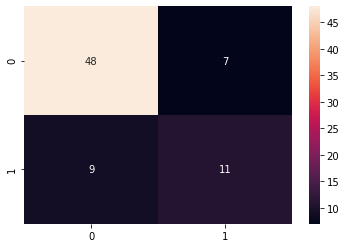

In [40]:
sns.heatmap(cm,annot=True)

<AxesSubplot:>

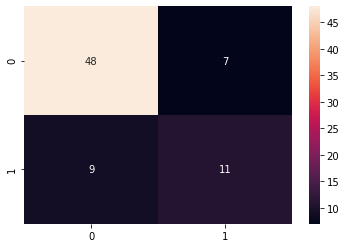

In [41]:
sns.heatmap(confusion_matrix(ytest,predict),annot=True)

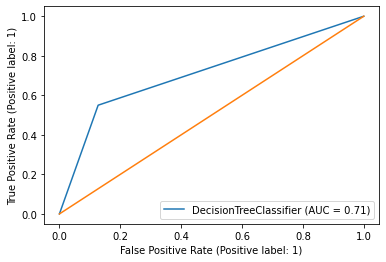

In [44]:
plot_roc_curve(dtc,xtest,ytest)
plt.plot([0,1],[0,1])